# Regression Tree and Random Forest

In this notebook I will deploy both the rgression tree and random forest algorithms in R. The dataset I use is the crime dataset from UCI http://www.statsci.org/data/general/uscrime.txt data dictionary at http://www.statsci.org/data/general/uscrime.html.



### Load libraries and set seed



In [1]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [2]:
#install.packages('rpart')
#install.packages('corrplot')
#install.packages('rpart.plot')
#install.packages('randomForest')
#install.packages('party')
#install.packages('boot')
#install.packages('ROCR')
#install.packages('caret')
#install.packages('data.table')
#install.packages('dplyr')
#install.packages('ggplot2')
#install.packages('ggthemes')
#install.packages("gridExtra")

library(rpart)
library(corrplot)
library(rpart.plot)
library(randomForest)
library(party)
library(boot)
library(ROCR)
library(caret)
library(data.table)
library(dplyr)
library(ggthemes)
library(gridExtra)
library(ggplot2)

set.seed(37)

Warning message:
"package 'rpart' was built under R version 3.4.3"Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded
Warning message:
"package 'rpart.plot' was built under R version 3.4.3"Warning message:
"package 'randomForest' was built under R version 3.4.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'party' was built under R version 3.4.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.4.3"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.4.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.4.3"Wa



### Load data



In [3]:
data <- read.table('uscrime (1).txt', header = T)
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682




### Check str of data



In [4]:
str(data)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 



### Check summary of data



In [5]:
summary(data)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            



## Regression Tree





### Fit regression tree model to all of the data



In [6]:
rtree_regression_crime_all <- rpart(Crime~., data,method='anova')
rtree_regression_crime_all

n= 47 

node), split, n, deviance, yval
      * denotes terminal node

1) root 47 6880928.0  905.0851  
  2) Po1< 7.65 23  779243.5  669.6087  
    4) Pop< 22.5 12  243811.0  550.5000 *
    5) Pop>=22.5 11  179470.7  799.5455 *
  3) Po1>=7.65 24 3604162.0 1130.7500  
    6) NW< 7.65 10  557574.9  886.9000 *
    7) NW>=7.65 14 2027225.0 1304.9290 *



As we can see above the optimal regression tree is splitting on the following branches:





### Visualizing Decision Tree



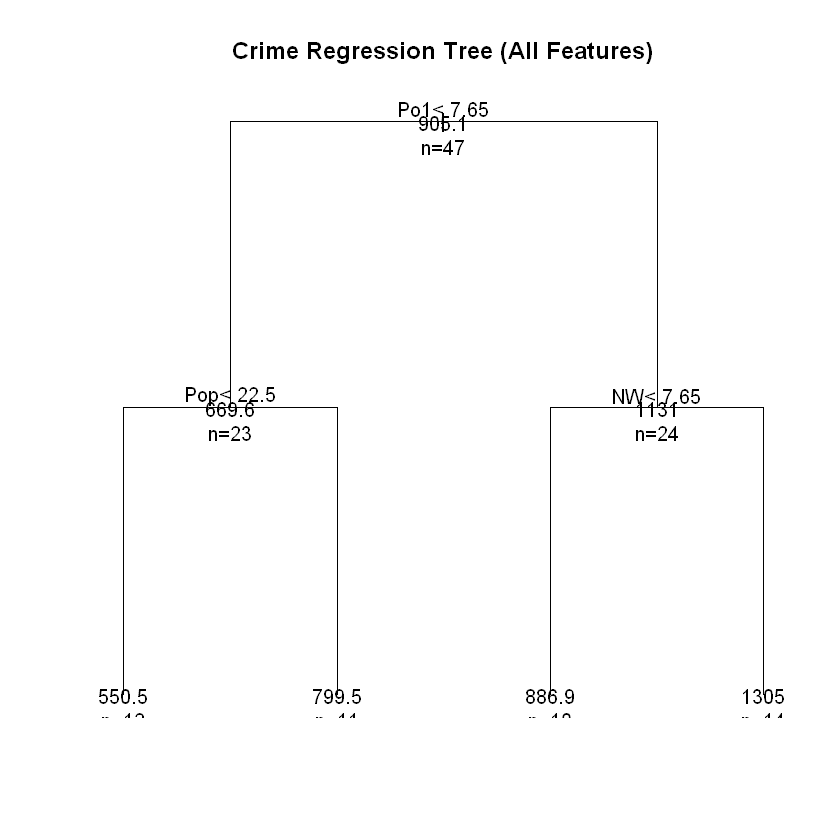

In [7]:
plot(rtree_regression_crime_all, uniform=TRUE, main="Crime Regression Tree (All Features)")
text(rtree_regression_crime_all, use.n=TRUE, all=TRUE)



See how this plot is cut off and pretty below-average quality? The `prp` function from the `rpart.plot` library makes much prettier visualizations. For further reference and an example:

reference: https://cran.r-project.org/web/packages/rpart.plot/rpart.plot.pdf



In [8]:
?prp

cex 1   xlim c(0, 1)   ylim c(-0.35, 1.35)


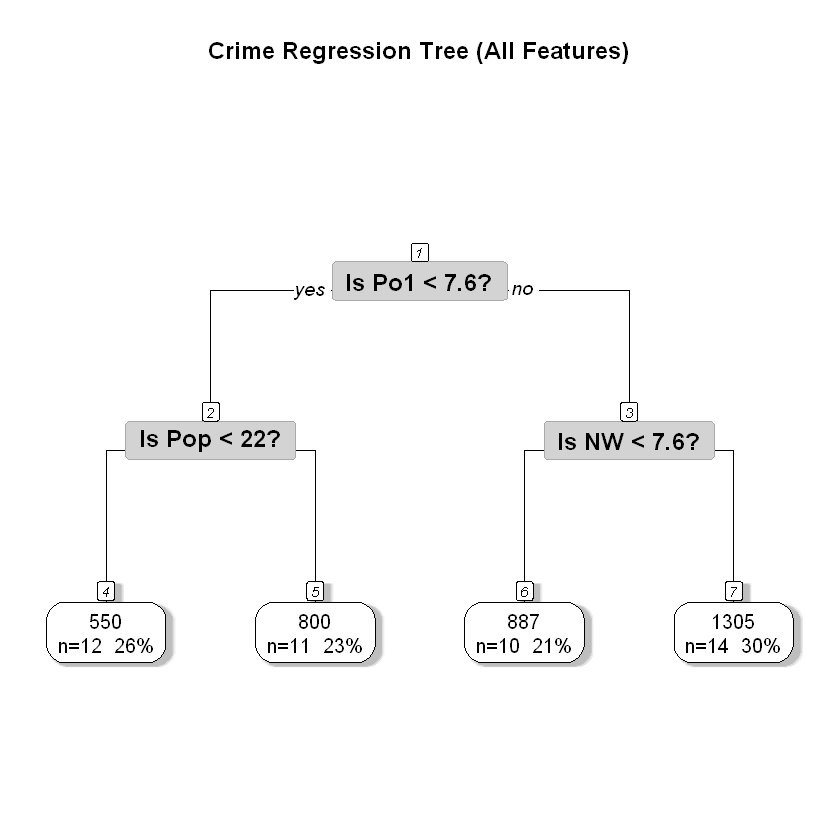

In [9]:
prp(rtree_regression_crime_all, main="Crime Regression Tree (All Features)",
extra=101, # display crime rate and percent of obs
nn=TRUE, # display the node numbers
fallen.leaves=TRUE, # put the leaves on the bottom of the page
shadow.col="gray", # shadows under the leaves
faclen=0, # faclen=0 to print full factor names
trace=1, # print the automatically calculated cex
split.cex=1.2, # make the split text larger than the node text
split.prefix="Is ", # put "is " before split text
split.suffix="?", # put "?" after split text
split.box.col="lightgray", # lightgray split boxes (default is white)
split.border.col="darkgray", # darkgray border on split boxes
split.round=.5) # round the split box corners a tad

According to our regression tree model, the three optimal features to branch on include:
* Po1: Per capita expenditure on police protection in 1960
* Pop: State population in 1960 in hundred thousands
* NW: Percentage of nonwhites in the population

A state's population seems to be correlated with crime rates. This can be proven visually as shown below:



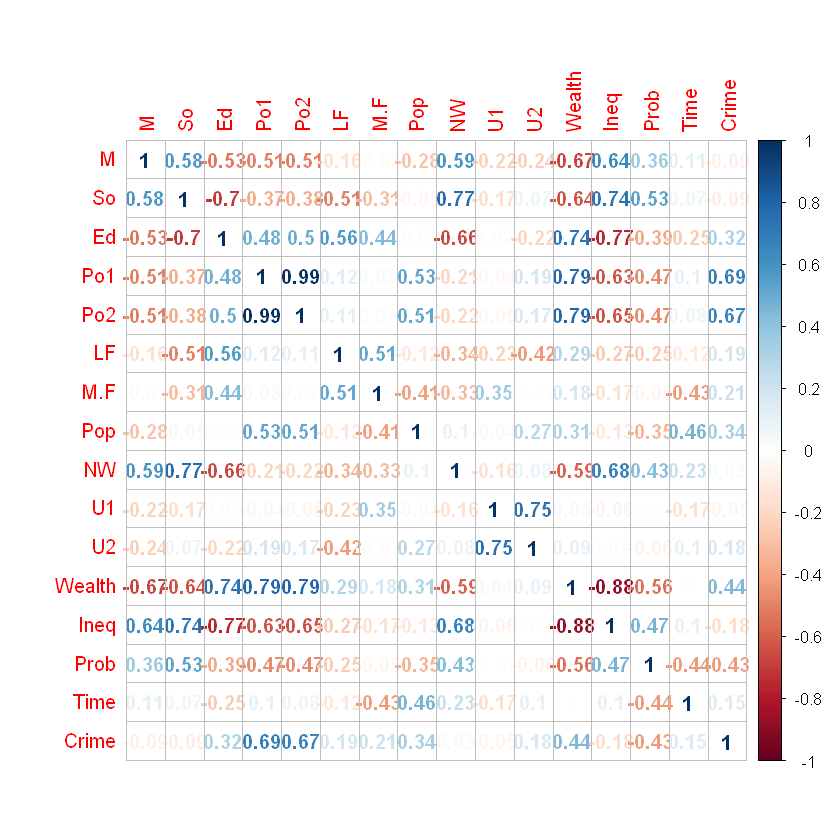

In [10]:
# Grab only numeric columns
numeric_columns <- sapply(data, is.numeric)
# Filter to numeric columns for correlation
data_for_corr_plot <- cor(data[,numeric_columns])
corrplot(data_for_corr_plot,method='number')



### Feature importance

We may access the relative feature importance according to our regression tree model by accessing the `variable.importance` element of our `rpart` class.



In [11]:
rtree_regression_crime_all$'variable.importance'

Po1       Po2    Wealth      Ineq      Prob         M        NW       Pop 
2497521.7 2497521.7 1628818.5 1602212.0 1520230.6 1388627.8 1245883.8  661770.6 
     Time        Ed        LF        So 
 601906.0  569545.9  203872.5  161800.8



Interesting. The regression tree seems to have put the most relative importance on the features who share the largest correlation (absolute value - including positives and negative correlations) with the `Crime` response. All that feature selection commentary is nice, but how does our model perform when it comes to predicting `Crime`?





### Interpretting model output



In [12]:
summary(rtree_regression_crime_all)

Call:
rpart(formula = Crime ~ ., data = data, method = "anova")
  n= 47 

          CP nsplit rel error    xerror      xstd
1 0.36296293      0 1.0000000 1.0478601 0.2673417
2 0.14814320      1 0.6370371 0.9052972 0.2161637
3 0.05173165      2 0.4888939 1.1113841 0.2673124
4 0.01000000      3 0.4371622 1.0580427 0.2604893

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  improve=0



As we can see from the MSE attached with each node, the outliers on the high side are really messing with our regression tree model's ability to make predictions. An interesting experiment would be to remove outliers using the Grubbs test and recreate the regression tree models. Because this notebook is already getting a little lengthy, I'll spare the reader (this time).




Regression tree:
rpart(formula = Crime ~ ., data = data, method = "anova")

Variables actually used in tree construction:
[1] NW  Po1 Pop

Root node error: 6880928/47 = 146403

n= 47 

        CP nsplit rel error xerror    xstd
1 0.362963      0   1.00000 1.0479 0.26734
2 0.148143      1   0.63704 0.9053 0.21616
3 0.051732      2   0.48889 1.1114 0.26731
4 0.010000      3   0.43716 1.0580 0.26049


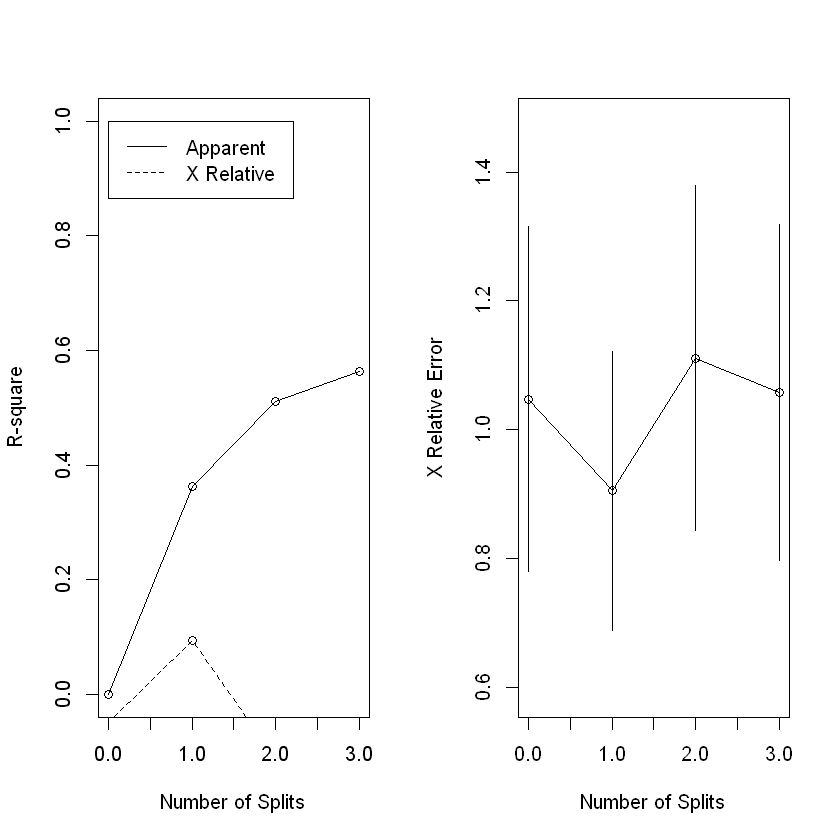

In [13]:
par(mfrow=c(1,2))
rsq.rpart(rtree_regression_crime_all)



As we can see from the summary and plots above, the optimal model occurs when the tree is branched three times. It is interesting to note both from the summary and variable importance that our model could use either Po1 or Po2 as the first branch. This should come as no surprise because both features are providing nearly identical information (amount of police force expenditure per capita) and are strongly correlated with one another. Our test point would be predicted using the regression model in node six (887 `Crime` rate) as it contains the following features:
* Po1 = 12.0
* NW = 1.1

This is significantly lower then the crime rate predicted by the simple linear regression model (~1300) and the linear regression model using principal components in (~1250). Let's see if we can improve this model using a random forest.





## Random Forest





### Fit random forest model to all of the data



In [14]:
rforest_regression_crime_all <- randomForest(Crime ~ .,data, importance = T)
rforest_regression_crime_all


Call:
 randomForest(formula = Crime ~ ., data = data, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 88479.19
                    % Var explained: 39.56

In [15]:
rf_importance <- importance(rforest_regression_crime_all, type=1)
rf_importance

,%IncMSE
M,3.2950571
So,3.8011141
Ed,3.4635630
Po1,11.6466665
Po2,9.8996807
LF,2.3879621
M.F,1.1918086
Pop,1.5475195
NW,9.0983717
U1,-0.6919022




According to the random forest, our most important features include:
* Po1
* Po2
* NW
* Prob

With the exception of the NW feature, all of these features are relatively correlated with the `Crime` feature. This is a shortcoming of the default variable importance measure being calculated by the random forest model under the hood. Let's cross-validate our results and look at conditional importance instead of marginal importance amongst features.





According to Strobl et. al:

*Random forests show a preference for correlated predictor variables, that is also carried forward to any significance test or variable selection scheme constructed from the importance measures.*

This can be problematic in analytic problems where a high number of features relative to the number of data points observed are present. Additionally, the problem manifests itself when spurious correlations are present in the data. To overcome the shortcomings of this variable importance selection bias, we can examine the conditional importance between features.

reference: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-307

Stigler, Stephen M. "Correlation and causation: a comment." Perspectives in Biology and Medicine 48.1 (2005): 88-S94.

In [16]:
cv_rforest_regression_crime_all <- cforest(Crime~.,data,control=cforest_unbiased(mtry=5,ntree=500))
cv_rforest_regression_crime_all


	 Random Forest using Conditional Inference Trees

Number of trees:  500 

Response:  Crime 
Inputs:  M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time 
Number of observations:  47 


In [17]:
cv_importance <- varimp(cv_rforest_regression_crime_all)

In [18]:
conditional_importance <- varimp(cv_rforest_regression_crime_all,conditional=TRUE)

In [19]:
as.data.frame(cbind(rf_importance, cv_importance, conditional_importance))

,%IncMSE,cv_importance,conditional_importance
M,3.2950571,-106.74699,-280.73251
So,3.8011141,-119.20473,-95.58130
Ed,3.4635630,757.06357,164.12967
Po1,11.6466665,34758.28029,30130.83719
Po2,9.8996807,29172.90020,21730.86277
LF,2.3879621,227.76158,362.11342
M.F,1.1918086,31.13852,-406.38909
Pop,1.5475195,1365.61175,182.75677
NW,9.0983717,1097.57879,771.99531
U1,-0.6919022,-275.95453,-210.89496




Since random forests do not return a single tree solution, the best we can do is view the variable importance and the model prediction accuracy. Let's look at model prediction accuracy.





### Random Forest model prediction accuracy

First let's look at MSE. Then R^2.



In [20]:
mean(rforest_regression_crime_all$mse)

[1] 89844.69

In [21]:
mean(rforest_regression_crime_all$rsq)

[1] 0.3863182



Pretty dismal. Out of all the models built our simple linear regression model from with the top six significant features seems to remain the optimal model.

